# ***Linear Regression***

## ***Universidad Central***

## ***Maestría en analítica de datos***

## ***Métodos estadísticos para analítica de datos.***
## ***Docente: Luis Andrés Campos Maldonado.***

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split            # Train, Test sets
from sklearn.metrics import mean_absolute_error, r2_score       # Para obtener las métricas de evaluación.
from sklearn.metrics import mean_absolute_percentage_error      # Para obtener las métricas de evaluación.
from sklearn.linear_model import LinearRegression

# Parte estadística.
import statsmodels.formula.api  as smf                          # Modelos lineal.
from scipy.stats import shapiro, probplot, f, f_oneway          # libreria estadistica de Scipy
from statsmodels.stats.anova import anova_lm                    # Anova del modelo lineal

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15,6)
warnings.filterwarnings("ignore")
url_base = "https://raw.githubusercontent.com/lacamposm/Metodos-Estadisticos/main/data/"

## ***Regresión lineal simple.***

La regresión lineal simple es una técnica estadística utilizada para modelar la relación entre dos variables: una dependiente y una independiente. La idea principal es encontrar una línea recta (llamada línea de regresión) que mejor se ajuste a los datos observados, de manera que podamos predecir los valores de la variable dependiente con base en los valores de la variable independiente.

El objetivo de la regresión lineal es minimizar la suma de los errores cuadráticos entre los valores observados $y_i$ y los valores predichos $\hat{y}_i$. La función de error (o función de costo) se puede expresar como:

$$\text{RSS}(\beta_0, \beta_1) = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2$$

Donde:
- $\text{RSS}$ es el **residual sum of squares** o suma de los residuos al cuadrado.
- $y_i$ es el valor observado de la variable dependiente.
- $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1x_i$ es el valor predicho por la línea de regresión.
- $x_i$ es el valor de la variable independiente.
- $n$ es el número total de observaciones.

En regresión lineal simple, podemos encontrar los valores óptimos de los coeficientes \(\beta_0\) y \(\beta_1\) que minimizan la suma de los cuadrados de los residuos (**RSS**) mediante las siguientes fórmulas analíticas:



$$\hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}$$

Consideremos la siguiente situación:

Se ha recolectado información sobre 122 individuos, cada uno de ellos respondió por:

1. ***`Exposure`:*** Numéro de años que el trabajador estuvo expuesto al polvo de algodón.

2. ***`PEFR`:*** Proporciona una medida de la capacidad pulmonar del trabajador ([tasa de flujo respiratorio](https://en.wikipedia.org/wiki/Peak_expiratory_flow)).

***¿Cómo se relaciona el `PEFR` con `Exposure`?***

In [2]:
data = "LM_simple_example_1.csv"
df = pd.read_csv(url_base+data,)
df.head()

PEFR  Exposure
0   390         0
1   410         0
2   430         0
3   460         0
4   420         1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PEFR      122 non-null    int64
 1   Exposure  122 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


Primero veamos la relación vía un scatterplot:

In [4]:
(
    px.scatter(
        df, x="Exposure", y="PEFR", template="plotly_white",
        title=f"Scatterplot: Exposure vs. PEFR.<br>Coeficiente de correlacion de Pearson: {df.corr().iloc[0,1]:.3f}"
        )
).show()

Recordemos que la ***regresión lineal simple*** estima cuánto cambiará `PERF` cuando `Exposure` cambie en un
cierta cantidad. Es decir, deseamos explicar si las diferencias en los niveles de `PERF` se asocian con las diferencias en los años de exposición (`Exposure`). Nuestro modelo será en este caso:


$$PERF = \beta_0 +\beta_1*Exposure+\epsilon$$ 

$\beta_0$ es una constante conocida como 
el intercepto, $\beta_1$ será la pendiente, ambos de denominan parámetros de la regresión. $\epsilon$ es un error o ruido que NO se logra explicar con el modelo. La ***regresión lineal simple*** trata de encontrar la "mejor" recta para predecir la variable ***Target*** `PEFR` como una función de la ***feature*** `Exposure`



Hacemos uso de [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [5]:
# Ajuste de regresión con sklearn
model_lm = LinearRegression()
y = df["PEFR"]                        # Target.
X = df.drop(columns=["PEFR"])         # Feature.
model_lm.fit(X, y)

LinearRegression()

In [6]:
print(f"Intercepto: {model_lm.intercept_:.3f}")
print(f"Coeficiente Exposure: {model_lm.coef_[0]:.3f}")

Intercepto: 424.583
Coeficiente Exposure: -4.185


En caso que seleccionemos este ajuste muestro modelo será:

$$PEFR = 424.583-4.185*Exposure+\epsilon$$

La interpretación de los coeficientes es la siguiente:

1. $\hat{\beta_0}=424.583$: Es el intercepto del modelo, note que para un valor de $Exposure=0$, se obtiene que $PEFR=424.583$, así, se espera que un trabajador sin exposición tenga ese valor medio del indicador de respiración.

2. $\hat{\beta_1}=-4.185$: Por cada aumento unitario en la variable $Exposure$ se espera que $PEFR$ disminuya en promedio el valor en $\hat{\beta_1}$

Veamos la recta de ajuste:

In [7]:
# Regresión simple, recta de ajuste por OLS.
px.scatter(
    df, x="Exposure", y="PEFR", template="plotly_white",
    title="Recta de ajuste por OLS", trendline="ols",
    trendline_color_override="red"
).show()

### ***Valores ajustados y residuales.***

Los conceptos importantes en el análisis de regresión son los valores ajustados (las predicciones con el modelo) y los residuales (errores de predicción). En general, para $Y$ variable target y $X$ variable explicativa o (feature para predicir), los datos no caen exactamente en la recta de ajuste, por lo que la ecuación de regresión debe incluir un término de error explícito $\epsilon_i$


$$Y_i=\beta_0+\beta_1*X+ϵ_i$$


Los ***valores ajustados***, denotados por $\hat{Y_i}$ vienes dados por la expresión:


$$\hat{Y_i}=\hat{\beta_0}+\hat{\beta_1}*X_i$$


Calculamos los residuos estimados ($\hat{\epsilon_i}$) mediante:


$$\hat{\epsilon_i}=Y_i-\hat{Y_i}$$

In [8]:
fitted = model_lm.predict(X)        # Valores ajustados Yi^
resid = y - fitted                  # Residuales estimados.
# Residuales
pd.DataFrame({"valor_observado":y, "valor_ajustado":fitted,"residual":resid})

valor_observado  valor_ajustado    residual
0                390      424.582807  -34.582807
1                410      424.582807  -14.582807
2                430      424.582807    5.417193
3                460      424.582807   35.417193
4                420      420.398230   -0.398230
..               ...             ...         ...
117              450      332.522124  117.477876
118              490      332.522124  157.477876
119              500      332.522124  167.477876
120              370      328.337547   41.662453
121              390      328.337547   61.662453

[122 rows x 3 columns]

### ***Anova***

Dado que queremos explicar la variabilidad de la variable `Target` con respecto a su media podemos descomponerla de la siguiente manera:

$$\sum_{i=1}^{n}(y_i-\bar{y})^{2}=\sum_{i=n}^{n}(y_i-\hat{y_i})^{2}+\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^{2}$$

En la expresión expresión anterior se identifican:

1. ***Suma de cuadrados totales***:
$$SCT = \sum_{i=1}^{n}(y_i-\bar{y})^{2}$$
  Esta suma determina la variabilidad respecto a su media.

2. ***Suma de cuadrados del error:***
$$SCE=\sum_{i=n}^{n}(y_i-\hat{y_i})^{2}$$
  Esta  suma toma en cuenta la variación con la recta estimada. La variación residual que queda sin explicar por la recta de regresión.
  
3. ***Suma de cuadrados de la regresión:***
$$SCR=\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^{2}$$
  La cantidad de variabilidad en las observaciones explicada por la recta regresión. Esta suma toma en cuenta la variación de las observaciones y es atribuible al efecto lineal del modelo.


In [9]:
# With statsmodels. from statsmodels.stats.anova import anova_lm ---> Anova del modelo lineal   
model_lm_sm = smf.ols(formula="PEFR ~ Exposure", data=df).fit()     ## Ajuste con statsmodels.
display(model_lm_sm.summary())
print("\nAnova:")
anova_lm(model_lm_sm, typ=1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PEFR   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     9.974
Date:                Thu, 24 Oct 2024   Prob (F-statistic):            0.00201
Time:                        17:59:01   Log-Likelihood:                -735.68
No. Observations:                 122   AIC:                             1475.
Df Residuals:                     120   BIC:                             1481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    424.5828     20.796     20.417      0.000     383.408     465.757
Exposure      -4.1846      1.325     -3.158      0.002      -6.808      -1.561
==============================================================================
Omnibus:                        0.767   Durbin-Watson:                   1.111
Prob(Omnibus):                  0.681   Jarque-Bera (JB):                0.891
Skew:                          -0.162   Prob(JB):                        0.641
Kurtosis:                       2.734   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Anova:


df        sum_sq        mean_sq         F    PR(>F)
Exposure    1.0  1.026333e+05  102633.255269  9.974366  0.002008
Residual  120.0  1.234764e+06   10289.702381       NaN       NaN

***La tabla anterior es una típica ANOVA***. 

El estadístico $F_{1}^{n-2}$ se utiliza para contrastar el sistema de hipótesis:

$$H_0:\beta_1=0$$
$$vs.$$
$$H_1:\beta_1\neq 0$$

Es decir, este ***mide la pertinencia o no del modelo (Significancia global del modelo).***

Para el caso específico de nuestro problema el $p$-valor de la prueba es $0.002008$, es decir, ***podemos explicar las diferencias en la variable `PEFR` con las diferencias existentes en la variable `Exposure`.***

### ***Coeficiente de determinación.***

El coeficiente de determinación se encuentra con la fórmula:

$$R^{2}=\frac{SCR}{SCT}=1-\frac{SCE}{SCT}$$

Al ser $SCT$ una medida de la variabilidad de $Y$ sin considerar el efecto de la variable regresora y $SCE$ es una medida de la variabilidad de $Y$ que queda después de haber tenido en consideración a $X$, el coeficiente de determinación, $R^{2}$ se llama con frecuencia la proporción de la variación explicada por el regresor $X$. Este valor va de 0 y hasta 1, valores cercanos a 1 implican que la mayor parte de la variabilidad de $Y$ está explicada por el modelo de regresión.

In [10]:
SCE = 1.234764e+06                      # Suma de cuadrados del error.
SCR = 1.026333e+05	                    # Suma de cuadrados de la regresión.
SCT = (1.234764e+06+1.026333e+05)
R_2 = 1- SCE/SCT
print("El valor de R^2 es: {:.4f}".format(R_2))
print("Por lo tanto el {:.2f}% de la variabilidad de PEFR queda explicada por el modelo.".format(R_2*100))
#
print()
print(f"R^2 Con sklearn: {model_lm.score(X,y):.4f}")
# Con statsmodels
print()
print("Suma de cuadrados del error:", model_lm_sm.ssr)
print("Suma de cuadrados de la regresión:", model_lm_sm.mse_model)
print("Suma de cuadrados totales:", model_lm_sm.centered_tss)
print("R^2 con statsmodels:", model_lm_sm.rsquared)

El valor de R^2 es: 0.0767
Por lo tanto el 7.67% de la variabilidad de PEFR queda explicada por el modelo.

R^2 Con sklearn: 0.0767

Suma de cuadrados del error: 1234764.285714286
Suma de cuadrados de la regresión: 102633.25526932045
Suma de cuadrados totales: 1337397.5409836064
R^2 con statsmodels: 0.07674102286283369


### ***Análisis de residuales***

1. Debemos verificar que los residuales no estén correlacionados.
2. Homocedasticidad.
3. Que los residuales distribuyan aproximadamente normal


En primera medida debemos estimar el valor de $\sigma^{2}$, este valor está dado por la expresión:

$$\hat{\sigma}^{2}=\frac{SCE}{n-1}$$

***Que no es otra cosa que el cuadrado medio del error.***



In [11]:
# Estimación de sigma^2.
sigma_2 = 10289.702381
print("La estimación de la variabilidad del modelo es:", sigma_2)
# Estimación de sigma^2 con statsmodels.
print("La estimación de sigma^2 con statsmodels es:", model_lm_sm.scale)

La estimación de la variabilidad del modelo es: 10289.702381
La estimación de sigma^2 con statsmodels es: 10289.702380952383


### ***Normalidad.***

In [12]:
# NORMALIDAD: Test de Shapiro-Wills
# La prueba de Shapiro-Wilk prueba la hipótesis nula de que los datos se extrajeron 
# de una distribución normal.
p_value1 = shapiro(df["PEFR"])[1]                                   ### Normalidad variable respuesta
print("El p-valor del Test de Shapiro-Wills para la variable respuesta es: {:.3f}".format(p_value1))

p_value2 = shapiro(resid)[1]
print("El p-valor del Test de Shapiro-Wills para normalidad de los residuales:{:.3f}".format(p_value2))

El p-valor del Test de Shapiro-Wills para la variable respuesta es: 0.541
El p-valor del Test de Shapiro-Wills para normalidad de los residuales:0.586


Luego no podemos rechazar la hipótesis nula, por lo tanto no tenemos evidencia estadística para decir que los residuales no distribuyen aproximadamente normal.

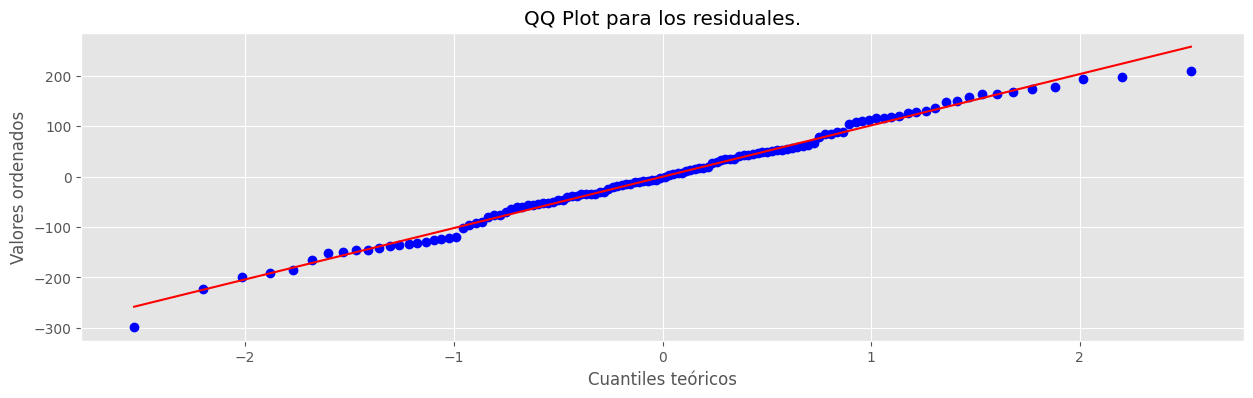

In [13]:
# QQ plot para los residuales observados. from scipy.stats import probplot
plt.figure(figsize = (15,4))
probplot(x=resid, dist="norm", plot=plt)              ## QQ-plot.
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Valores ordenados")
plt.title("QQ Plot para los residuales.")
plt.show()

Como ***conclusión*** notemos que se cumplen los supuestos del modelo, pero el poder explicativo del modelo solo llega al $7.67\%$, lo cual no es un buen indicador.

## ***Regresión lineal múltiple.***

En una **regresión lineal múltiple**, el objetivo es modelar la relación entre una variable dependiente $Y$ (variable objetivo o `Target`) y múltiples variables explicativas $X_1, X_2, \ldots, X_p$, de tal manera que se pueda predecir el comportamiento de $Y$ en función de estas variables explicativas. Entonces se quiere construir una función $f(X)$ donde $X=(X_1, \ldots, X_p)$ es un conjunto de variables explicativas (`Features`) que se utilizaran para pronosticar y explicar las diferencias presentes en la variable target $Y$.


En un modelo de regresión lineal, se usan las funciones del tipo:
$$Y=\beta_0 +\beta_1X_1+\beta_2X_2+...+\beta_pX_p +\epsilon $$ 

donde $\epsilon$ se conoce como el error o ruido del modelo.

Sobre este error se realizan varios supuestos para que el modelo tenga validez estadística.
1. ***Normalidad o gaussianidad:*** Campana de Gauss
2. ***Homocedasticidad:*** La variabilidad de mi modelo no depende de las X
3. ***Independencia.***

La funcion a optimizar en este se toma la forma:

$$\text{RSS}(\beta_0, \beta_1, \dots, \beta_p) = \sum_{i=1}^{n} \left( y_i - \left( \beta_0 + \beta_1 X_{i1} + \dots + \beta_p X_{ip} \right) \right)^2
$$


Donde:
- $\text{RSS}$ es la suma de los residuos al cuadrado (**Residual Sum of Squares**).
- $y_i$ es el valor observado de la variable dependiente $Y$.
- $X_{i1}, X_{i2}, \dots, X_{ip}$ son los valores de las variables explicativas para la $i$-ésima observación.

La estimación de los coeficientes $\beta_0, \beta_1, \dots, \beta_p$ que minimizan la función de costo se puede obtener mediante la fórmula de **mínimos cuadrados ordinarios (OLS)** en su forma matricial:

$$\hat{\boldsymbol{\beta}} = \left( X^T X \right)^{-1} X^T y$$



#### ***Ejemplo 1.***


Con el objetivo de evaluar la calidad de una película utilizada en máquinas fotográficas, el  tiempo  de duración de la película,  en horas,  se relaciona con la densidad máxima de la película bajo tres condiciones experimentales: $72^{o}C$, $82^{o}C$ y $92^{o}C$. El objetivo es explicar las diferencias en el tiempo de duración de la película usando la densidad máxima  y la temperatura.

In [14]:
df2 = pd.read_excel(url_base + "chapman.xlsx")
df2.head()
df2.describe().T

count        mean         std    min    25%     50%     75%  \
tiempo        21.0  192.000000  133.194594  24.00  96.00  144.00  288.00   
densidad      21.0    2.264762    0.890020   0.65   1.49    2.27    2.91   
temperatura   21.0   82.000000    8.366600  72.00  72.00   82.00   92.00   

                max  
tiempo       504.00  
densidad       3.55  
temperatura   92.00

(A)	Haga  un  gráfico  de  los  datos que  incluya  las  tres  variables  consideradas.  Comente.

In [15]:
df2["temperatura"] = df2["temperatura"].astype("object")

px.scatter(
    df2, x="densidad", y="tiempo", template="plotly_white",
    title="Densidad vs. Tiempo", trendline="ols", trendline_color_override="red"
).show()

***Respuesta***

Los plots anterior muestra que el tiempo de duración de una película disminuye a medida que la densidad máxima de la película aumenta, es decir, al parecer existe una relación lineal negativa entre el `Tiempo de duración` de la película y la `densidad máxima` de la película. Además es diferente según las tres condiciones experiementales, quizá se presenta interacción entre `densidad` y `temperatura`.

In [16]:
px.scatter(
    df2, x="densidad", y="tiempo", color="temperatura",
    template="plotly_white", title="Densidad vs. Tiempo", trendline="ols"
).show()

#### ***Ejemplo 2.***

Ajuste a los datos un modelo de regresión lineal múltiple donde la respuesta es el tiempo de duración  de  la  película  y  las  variables  explicativas  son  la  densidad  máxima, la condición experimental  y la interacción entre estas.

In [17]:
# Media de cada grupo de "temperatura" de la variable Target "tiempo".
df2.groupby("temperatura")["tiempo"].mean()

temperatura
72    288.0
82    192.0
92     96.0
Name: tiempo, dtype: float64

In [18]:
# Modelo con solo la feature categórica.
df2["temperatura"] = df2["temperatura"]
cate = smf.ols(formula = "tiempo ~ temperatura", data = df2).fit()
print(cate.summary())

                            OLS Regression Results                            
Dep. Variable:                 tiempo   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     5.143
Date:                Thu, 24 Oct 2024   Prob (F-statistic):             0.0171
Time:                        17:59:02   Log-Likelihood:                -127.27
No. Observations:                  21   AIC:                             260.5
Df Residuals:                      18   BIC:                             263.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           288.0000     42.33

Para este caso se observa que la diferencia de las medias es estadísticamente significativa, es decir, hay diferencias en las medias entre las categorías.

In [19]:
# Modelo SIN interacción.
model_ex2_with_inter = smf.ols(formula = "tiempo ~ densidad + temperatura", data = df2).fit()
print(model_ex2_with_inter.summary())

                            OLS Regression Results                            
Dep. Variable:                 tiempo   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     22.15
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           4.15e-06
Time:                        17:59:02   Log-Likelihood:                -115.31
No. Observations:                  21   AIC:                             238.6
Df Residuals:                      17   BIC:                             242.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           568.0902     52.72

Con el modelo anterior se logra explicar un $79.6\%$ de las diferennias de la variable `Target` (tiempo). Note además que con este modelo obtemos una expresión de la forma:

$$tiempo=568.09-105.9228*densidad - 275.07*temperatura_{\_82}-105.9228*temperatura_{\_92}$$

En cada obtenemos una recta de regresión:

1. ***Caso 1: Corresponde a la temperatura de 72 grados:*** $tiempo=568.09-105.9228*densidad$: 
 
2. ***Caso 2: Corresponde a la temperatura de 82 grados:*** $tiempo=434.57 -105.922* densidad$

3. ***Caso 3: Corresponde a la temperatura de 92 grados:*** $tiempo=293.016 -105.922* densidad$

Estas rectas tienen la particularidad de que son rectas paralelas, es decir, no estamos teniendo en cuenta la ***interacción*** entre las dos 2 features.

***Modelado de efectos de interacción.***

Profundicemos en las interacciones potenciales observando dos de los predictores en tándem: `waterfront` y posición geográfica (`lat` and `long`). Específicamente, ¿el efecto de la posición geográfica es diferente entre las casas que tienen vista frente al mar y las que no?

In [20]:
# Modelo CON interacción.
model_ex2 = smf.ols(formula = "tiempo ~ densidad*temperatura", data = df2).fit()
print(model_ex2.summary())

                            OLS Regression Results                            
Dep. Variable:                 tiempo   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     266.3
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           4.30e-14
Time:                        17:59:02   Log-Likelihood:                -84.791
No. Observations:                  21   AIC:                             181.6
Df Residuals:                      15   BIC:                             187.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

#### ***Ejercicio 5.***

Interprete las estimaciones  de los parámetros excepto  el intercepto.

In [21]:
px.scatter(
    df2, x="densidad", y="tiempo", color="temperatura", 
    template="plotly_white", title="Densidad vs. Tiempo", trendline="ols"
).show()

#### ***Ejercicio 6.***

Estime  la duración esperada de una película con una densidad máxima de 2, y  una  temperatura  de  $82^{o}C$. Use el método `predict()` del modelo ajustado.

In [22]:
model_ex2.predict({"densidad":2,"temperatura":82})

0    225.253073
dtype: float64

***Comentario.***

El tiempo esperado de duración de una película bajo la condición experimental de $82^{o}C$ y con densidad máxima igual a 2 es de $225.2531$.

### ***Ejemplo 3***

In [23]:
df = pd.read_csv(url_base + "kc_house_data.csv",)
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

### ***Exploración de datos***


Comencemos por revisar las columnas del conjunto de datos y lo que significan:

1. **id**: Identificación para la casa.
2. **date**: Fecha de venta de la casa.
3. **price**: Precio al que se vendió la casa.
4. **bedrooms**: Número de habitaciones.
5. **bathrooms**: Número de baños.
6. **sqft_living**: Pies cuadrados de la casa.
7. **sqft_lot**: Pies cuadrados del lote.
8. **floors**: Total de pisos (niveles) en casa.
9. **waterfront**: Si la casa tiene o no una vista de un paseo marítimo (whether or not the house has a view of a waterfront)
10. **view**: Un índice de 0 a 4 de qué tan buena es la vista desde la propiedad
11. **condition**: Condición de la casa (que tan buena está).
12. **grade**: Calificación general otorgada a la unidad de vivienda, basada en el sistema de calificación del condado de King.
13. **sqft_above**: Metros cuadrados de la casa aparte del sótano
14. **sqft_basement**: Metros cuadrados del sótano
15. **yr_built**: Año en que se construyó la casa
16. **yr_renovated**: Año en que fué renovada la casa.
17. **zipcode**: Código postal de la casa
18. **lat**: latitude coordinate of the house
19. **long**: longitude coordinate of the house
20. **sqft_lot15** :lotSize area in 2015(implies-- some renovations)
21. **sqft_living15:** Área de la sala de estar en 2015 (implica: algunas renovaciones) Esto podría o no haber afectado el área del tamaño del lote

In [24]:
#  Vamos a formar nuestro Dataset de trabajo
df_ml = df.drop(columns=["id","sqft_living15","sqft_lot15"])
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
dtypes: flo

In [25]:
# "waterfront", "zipcode","view" no estan en el tipo de dato adecuado, 
df_ml[["waterfront", "zipcode", "view"]] = df_ml[["waterfront", "zipcode", "view"]].astype("category")
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   date           21613 non-null  object  
 1   price          21613 non-null  float64 
 2   bedrooms       21613 non-null  int64   
 3   bathrooms      21613 non-null  float64 
 4   sqft_living    21613 non-null  int64   
 5   sqft_lot       21613 non-null  int64   
 6   floors         21613 non-null  float64 
 7   waterfront     21613 non-null  category
 8   view           21613 non-null  category
 9   condition      21613 non-null  int64   
 10  grade          21613 non-null  int64   
 11  sqft_above     21613 non-null  int64   
 12  sqft_basement  21613 non-null  int64   
 13  yr_built       21613 non-null  int64   
 14  yr_renovated   21613 non-null  int64   
 15  zipcode        21613 non-null  category
 16  lat            21613 non-null  float64 
 17  long           21613 non-null  

### ***Variable Target***

In [26]:
px.histogram(df_ml["price"], title="Distribucion variable objetivo")

In [27]:
# Shapiro Test.
shapiro(df_ml["price"]) 
# No hay normalidad...

ShapiroResult(statistic=0.7120112962695346, pvalue=8.944594546946854e-104)

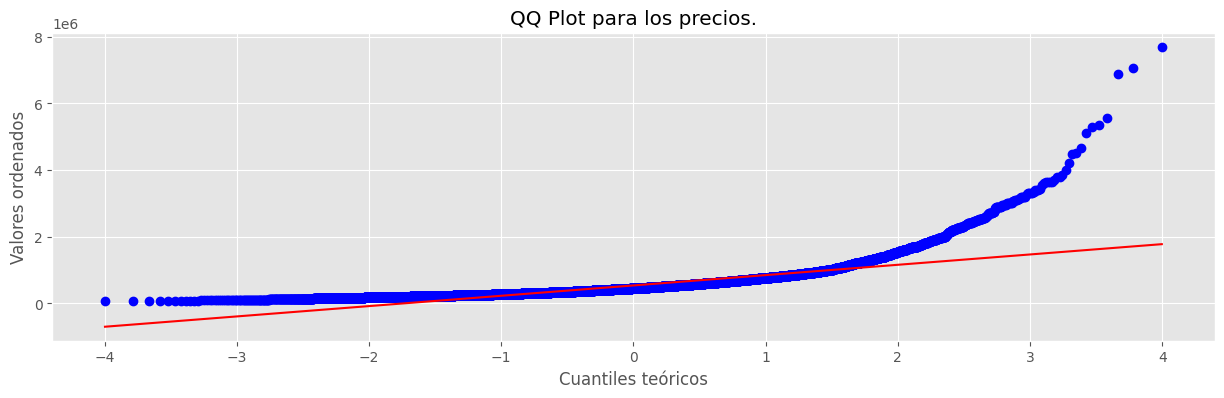

In [28]:
# QQ plot de la variable Target ----> "price"
plt.figure(figsize = (15,4))
probplot(x=df_ml["price"], dist="norm", plot=plt)
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Valores ordenados")
plt.title("QQ Plot para los precios.")
plt.show()

Notemos que la distribución se aleja bastante de la distribución normal. El algunos casos podemos buscar normalizar la variable Target. Recuerde que puede usar la transformación de [Box-Cox](https://en.wikipedia.org/wiki/Box%E2%80%93Cox_distribution)

In [29]:
# Note que podemos hacer uso de la siguiente transformación: (Coincide con Box-Cox!!!)
px.histogram(np.log(df_ml["price"]), title="Logaritmo natural de la variable price")

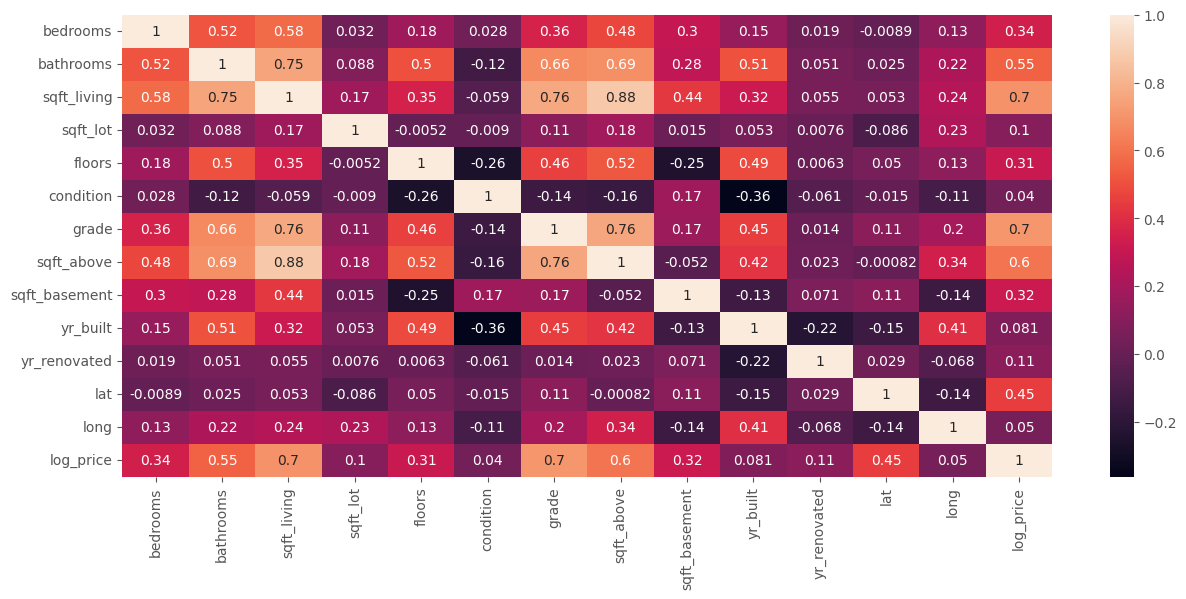

In [30]:
# Transformamos la varible target, log(price)
df_ml["log_price"] = np.log(df_ml["price"])

# Veamos las correlaciones. Tomemos un umbral pues tenemos bastantes variables
sns.heatmap(df_ml.drop(columns=["price"]).select_dtypes(np.number).corr(), annot=True)
plt.show()

In [31]:
higt_corr = df_ml.drop(columns=["price"]).select_dtypes(np.number).corr().loc["log_price"]
higt_corr.sort_values(ascending=False)

log_price        1.000000
grade            0.703634
sqft_living      0.695341
sqft_above       0.601801
bathrooms        0.550802
lat              0.449174
bedrooms         0.343561
sqft_basement    0.316970
floors           0.310558
yr_renovated     0.114498
sqft_lot         0.099622
yr_built         0.080655
long             0.049942
condition        0.039558
Name: log_price, dtype: float64

In [32]:
# Exploración con una de las más altamente relacionada
px.scatter(
    df_ml,  x="sqft_living", y="log_price", title="Sqft_living vs. Precio",
    trendline="ols", trendline_color_override="red", template="plotly_white"
)

In [33]:
df_temp = df_ml[["log_price", "sqft_living"]]
df_temp["log_sqft_living"] = np.log(df_temp["sqft_living"])


px.scatter(
    df_temp,  x="log_sqft_living", y="log_price", title="Sqft_living vs. Precio (log-log)",
    trendline="ols", trendline_color_override="red", template="plotly_white"
)

### ***Modelo Log-Log.***


El primer modelo de inspección es:

$$
\log(price) = \beta_0 + \beta_1 \log(sqft{\_}living) + \varepsilon
$$

In [34]:
formula = "log_price~log_sqft_living"
log_log_model = smf.ols(formula, data=df_temp).fit()
print(log_log_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.808e+04
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:59:04   Log-Likelihood:                -10240.
No. Observations:               21613   AIC:                         2.048e+04
Df Residuals:                   21611   BIC:                         2.050e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7299      0.047    1

Tenemos que ser conscientes de cómo interpretamos los coeficientes aquí. En una regresión en la que tanto la variable independiente como la dependiente son transformaciones logarítmicas (una *log-log regression*), el coeficiente $\beta_1$ debe interpretarse como el *cambio porcentual* en la variable dependiente asociada con el 1\% de cambio en la variable independiente. Esta comparación de cambio de porcentaje frente a porcentaje se conoce como **elasticidad**. Así, en nuestro modelo:

---

***Un aumento del 1\% en la superficie habitable se asocia con un aumento del 0,8368\% en el precio.***



---

### ***Modelo Log-Level***

Ahora construyamos un modelo lineal donde la transformación logarítmica solo se aplica a los precios de la vivienda, es decir, un modelo de la forma:
$$
\log(price) = \beta_0 + \beta_1 sqft{\_}living + \varepsilon
$$

El plot y la tabla de salida están a continuación:

In [35]:
log_log_model = smf.ols("log_price~sqft_living", data=df_ml).fit()
print(log_log_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.023e+04
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:59:04   Log-Likelihood:                -9670.2
No. Observations:               21613   AIC:                         1.934e+04
Df Residuals:                   21611   BIC:                         1.936e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2185      0.006   1916.883      

La interpretación del coeficiente de regresión vuelve a ser diferente. Esta es una *log-level regression*; es decir, uno en el que la variable dependiente se ha transformado logarítmicamente y la variable independiente no. Interpretamos el coeficiente como una **semi-elasticidad**, donde un aumento absoluto en `sqft_living` (porque no se le ha aplicado la función logarítmica) corresponde a un aumento porcentual en `price`. Específicamente, aquí podemos decir que:

---

***Un aumento en el espacio habitable de 1 pie cuadrado conduce a un aumento del 0,04 % en el precio.***

---

***Podemos ver en estos gráficos que los puntos de datos del modelo log-log se agrupan más uniformemente alrededor de la línea de mejor ajuste en diferentes niveles de la variable independiente en comparación con el otro modelo, lo que sugiere que el modelo log-log es más lineal.***

### ***Corriendo regresiones con variables transformadas.***

Por supuesto, no tiene sentido limitarnos a modelar los precios de la vivienda usando solo una variable independiente. Agreguemos varias variables más, algunas transformadas y otras no.

Notemos que `bathrooms` no es significativo para la regresión. ¿Por qué

¿En el contexto del problema que otras features considera importantes?. Podemos pensar en:

1. ***Ubicación del predio (`zipcode`).***
2. ***Cercania al mar (`waterfroont`).***
3. ***Vista del predio (`view`)***

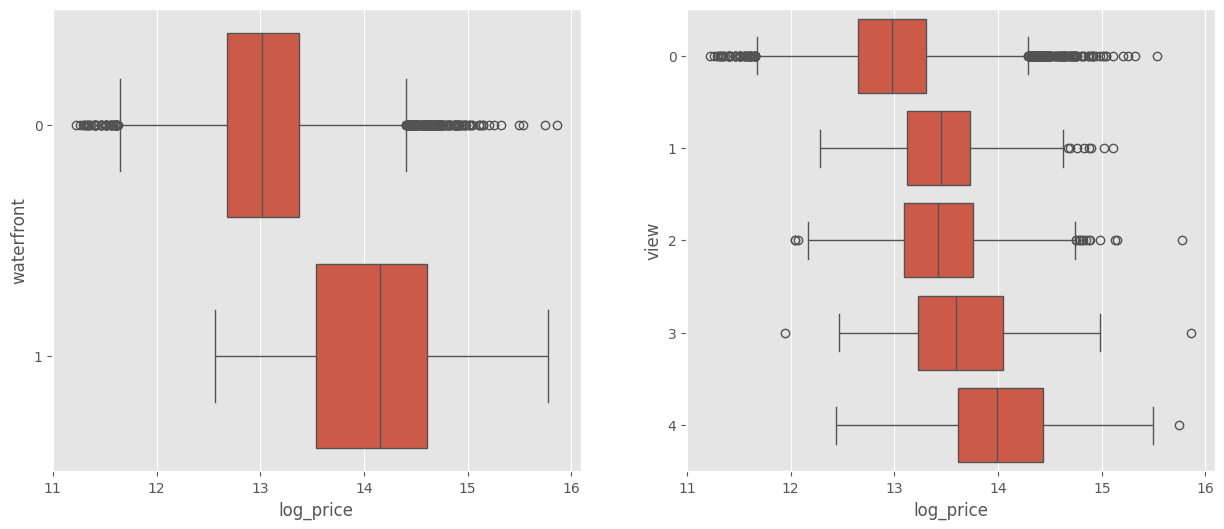

In [36]:
# Sirven para discriminar??
fig, ax = plt.subplots(1,2)
sns.boxplot(data=df_ml, x="log_price", y="waterfront", ax=ax[0])
sns.boxplot(data=df_ml, x="log_price", y="view", ax=ax[1])
plt.show()

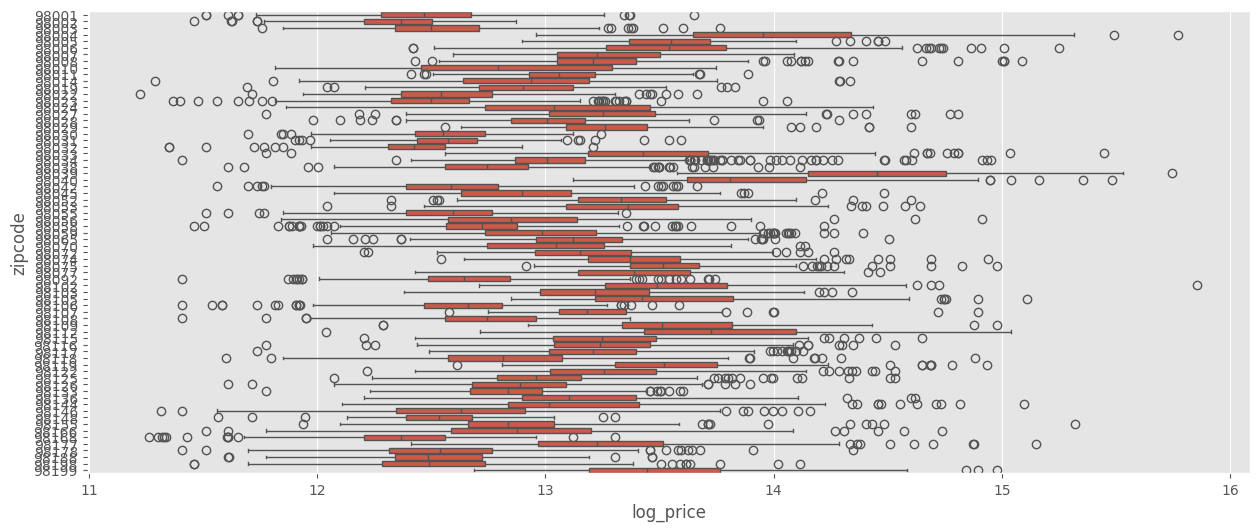

In [37]:
sns.boxplot(data=df_ml, x="log_price", y="zipcode")
plt.show()

***Vamos a incorporarlas al modelo.***

Hasta este momento hemos tenido en cuenta las siguientes features para incluir en el modelo:

1. `log_sqft_living` (sqft_living).
2. `zipcode`.
3. `view`
4. `waterfront`
5. `grade`.
6. `sqft_above`

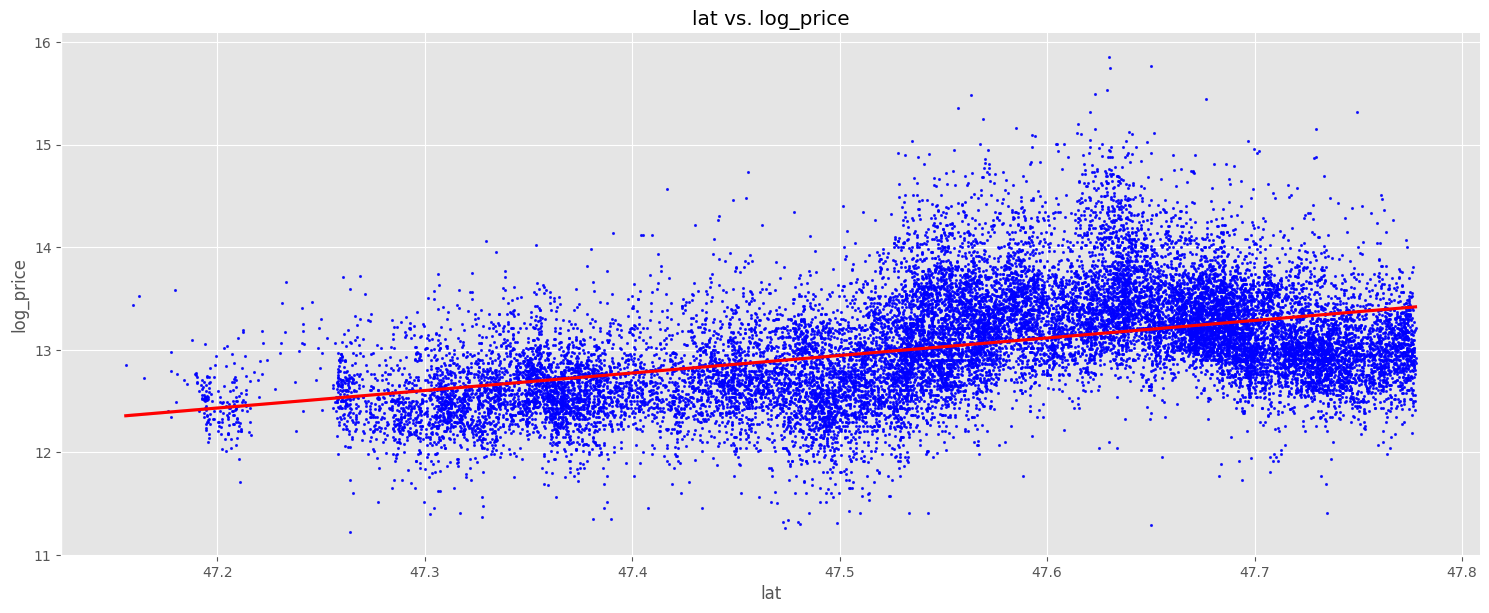

In [38]:
# Veamos el comportamiento de "lat"
sns.lmplot(data=df_ml,  x="lat", y="log_price", line_kws={"color": "red"}, height=6, aspect = 2.5,
           scatter_kws={"color":"blue","s": 1.5})
plt.title("lat vs. log_price")
plt.show()

Note que existe cierta relación lineal entre la variable `Target` y `lat`, además, puede observar lo siguiente:

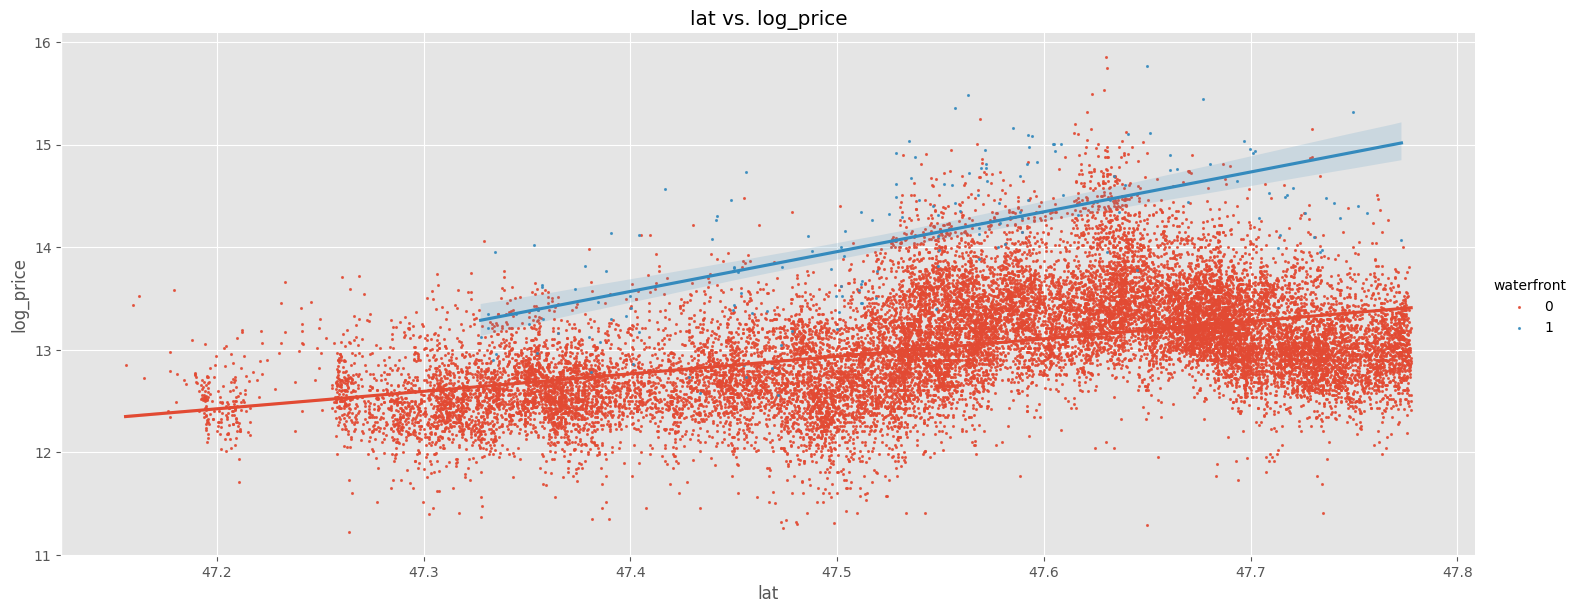

In [39]:
sns.lmplot(data=df_ml,  x="lat", y="log_price", height=6, aspect=2.5,
           scatter_kws={"s": 1.5}, hue="waterfront")
plt.title("lat vs. log_price")
plt.show()

***El plot anterior sugiere que podemos ingresar `lat` además del efecto de la interacción***

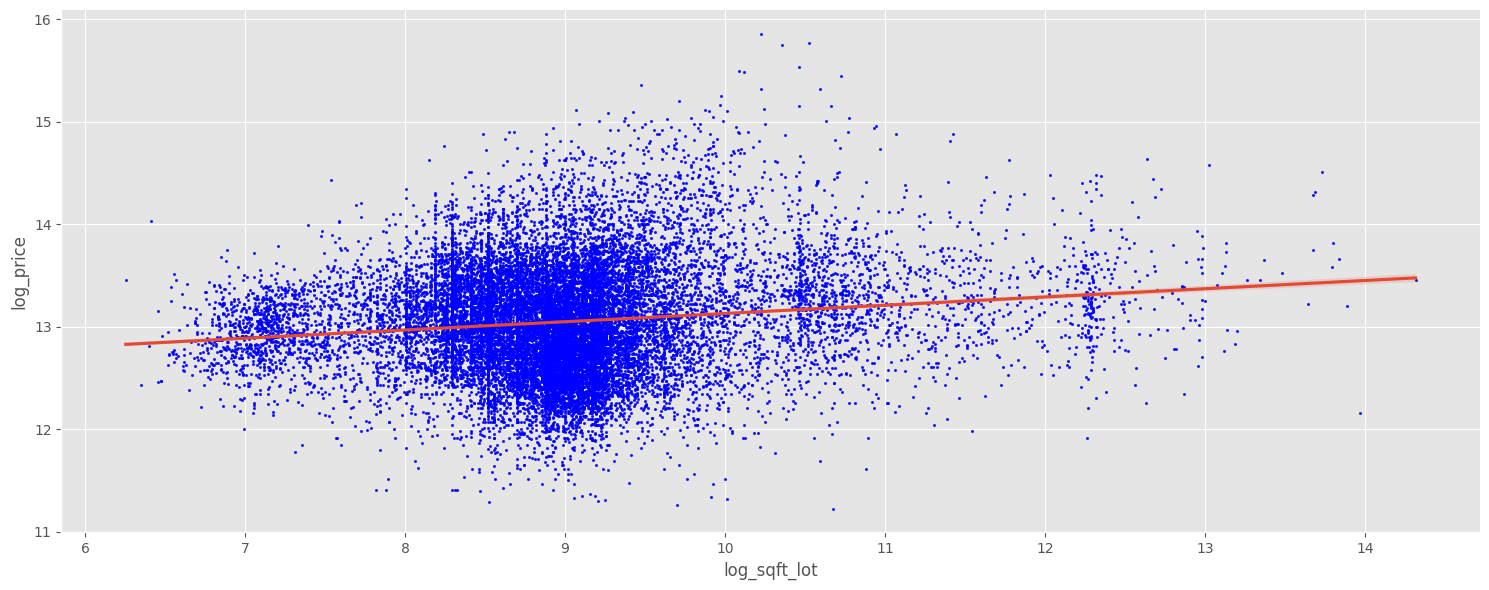

In [40]:
# Consideremos variables que no estén incluidas
temp = pd.DataFrame()
temp["log_sqft_lot"] = np.log(df_ml["sqft_lot"])
temp["log_price"] = df_ml["log_price"]
sns.lmplot(
    data=temp, x="log_sqft_lot", y="log_price", height=6, aspect = 2.5,
    scatter_kws={"s": 1.5,"color":"blue"}
) 
plt.show()

In [41]:
df_ml["renovated"] = df_ml["yr_renovated"] > 0 
formula_ref = """np.log(price) ~ np.log(sqft_living)*C(renovated) + np.log(sqft_lot) + bedrooms 
                  + floors + bathrooms + condition + C(view) + grade + yr_built + 
                  lat*C(waterfront) + I(lat**2) + long + C(zipcode)"""
model_ref = smf.ols(formula=formula_ref, data=df_ml).fit()
print(model_ref.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1795.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:59:10   Log-Likelihood:                 6111.7
No. Observations:               21613   AIC:                        -1.205e+04
Df Residuals:                   21524   BIC:                        -1.134e+04
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

## ***Train-Test sets***

In [42]:
df_kc = pd.read_csv(url_base + "kc_house_data.csv")
df_kc["renovated"] = df_kc["yr_renovated"].apply(lambda x: 1 if x>0 else 0)
df_kc["log_price"] = np.log(df["price"])
df_kc[["waterfront", "zipcode", "view"]] = df_kc[["waterfront", "zipcode", "view"]].astype("object")
df_kc = df_kc.drop(columns=["id","sqft_living15", "sqft_lot15", "date", "yr_renovated", "price", "renovated"])
df_kc.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors waterfront view  \
0         3       1.00         1180      5650     1.0          0    0   
1         3       2.25         2570      7242     2.0          0    0   
2         2       1.00          770     10000     1.0          0    0   
3         4       3.00         1960      5000     1.0          0    0   
4         3       2.00         1680      8080     1.0          0    0   

   condition  grade  sqft_above  sqft_basement  yr_built zipcode      lat  \
0          3      7        1180              0      1955   98178  47.5112   
1          3      7        2170            400      1951   98125  47.7210   
2          3      6         770              0      1933   98028  47.7379   
3          5      7        1050            910      1965   98136  47.5208   
4          3      8        1680              0      1987   98074  47.6168   

      long  log_price  
0 -122.257  12.309982  
1 -122.319  13.195614  
2 -122.233  12.100712  
3 -122.393  13.311329  
4 -122.045  13.142166

In [43]:
X_categorical_dummies = pd.get_dummies(df_kc.select_dtypes("object"), drop_first=True)
X_numerical = df_kc.select_dtypes(np.number).drop(columns=["log_price"], axis=1)
y = df_kc["log_price"]

X = pd.concat([X_numerical, X_categorical_dummies], axis=1)
display(X)
display(y)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
0             3       1.00         1180      5650     1.0          3      7   
1             3       2.25         2570      7242     2.0          3      7   
2             2       1.00          770     10000     1.0          3      6   
3             4       3.00         1960      5000     1.0          5      7   
4             3       2.00         1680      8080     1.0          3      8   
...         ...        ...          ...       ...     ...        ...    ...   
21608         3       2.50         1530      1131     3.0          3      8   
21609         4       2.50         2310      5813     2.0          3      8   
21610         2       0.75         1020      1350     2.0          3      7   
21611         3       2.50         1600      2388     2.0          3      8   
21612         2       0.75         1020      1076     2.0          3      7   

       sqft_above  sqft_basement  yr_built  ...  zipcode_98146  zipcode_98148  \
0            1180              0      1955  ...          False          False   
1            2170            400      1951  ...          False          False   
2             770              0      1933  ...          False          False   
3            1050            910      1965  ...          False          False   
4            1680              0      1987  ...          False          False   
...           ...            ...       ...  ...            ...            ...   
21608        1530              0      2009  ...          False          False   
21609        2310              0      2014  ...           True          False   
21610        1020              0      2009  ...          False          False   
21611        1600              0      2004  ...          False          False   
21612        1020              0      2008  ...          False          False   

       zipcode_98155  zipcode_98166  zipcode_98168  zipcode_98177  \
0              False          False          False          False   
1              False          False          False          False   
2              False          False          False          False   
3              False          False          False          False   
4              False          False          False          False   
...              ...            ...            ...            ...   
21608          False          False          False          False   
21609          False          False          False          False   
21610          False          False          False          False   
21611          False          False          False          False   
21612          False          False          False          False   

       zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  
0               True          False          False          False  
1              False          False          False          False  
2              False          False          False          False  
3              False          False          False          False  
4              False          False          False          False  
...              ...            ...            ...            ...  
21608          False          False          False          False  
21609          False          False          False          False  
21610          False          False          False          False  
21611          False          False          False          False  
21612          False          False          False          False  

[21613 rows x 86 columns]

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21608    12.793859
21609    12.899220
21610    12.904459
21611    12.899220
21612    12.691580
Name: log_price, Length: 21613, dtype: float64

In [44]:
# Con sklearn
# encoder = OneHotEncoder(drop="first", sparse_output=False)
# X_categorical_encoded = encoder.fit_transform(df_kc.select_dtypes("object"))
# pd.DataFrame(X_categorical_encoded)

## ***Train-Test sets***

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
X_train

bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  grade  \
1956          1       1.00          960     40946     1.0          5      5   
15678         3       1.75         1510      9720     1.0          3      7   
8729          3       2.25         1670      6414     1.0          4      8   
19064         3       2.00         2660    192099     1.0          4      9   
11291         3       1.75         1690     13500     1.0          4      7   
...         ...        ...          ...       ...     ...        ...    ...   
13123         5       5.00         3960     94089     2.0          3     10   
19648         2       2.50         1400      1262     2.0          3      8   
9845          3       2.25         2360     14950     1.0          4      9   
10799         4       2.00         2370     76665     2.0          4      8   
2732          4       2.25         2380     16236     1.0          3      7   

       sqft_above  sqft_basement  yr_built  ...  zipcode_98146  zipcode_98148  \
1956          960              0      1945  ...          False          False   
15678        1510              0      1948  ...          False          False   
8729         1670              0      1961  ...          False          False   
19064        2660              0      1964  ...          False          False   
11291        1690              0      1978  ...          False          False   
...           ...            ...       ...  ...            ...            ...   
13123        3960              0      1998  ...          False          False   
19648        1160            240      2008  ...          False          False   
9845         2360              0      1978  ...          False          False   
10799        2370              0      1978  ...          False          False   
2732         1540            840      1961  ...          False          False   

       zipcode_98155  zipcode_98166  zipcode_98168  zipcode_98177  \
1956           False          False          False          False   
15678          False          False          False          False   
8729           False          False          False          False   
19064          False          False          False          False   
11291          False          False          False          False   
...              ...            ...            ...            ...   
13123          False          False          False          False   
19648          False          False          False          False   
9845           False          False          False          False   
10799          False          False          False          False   
2732           False          False          False          False   

       zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  
1956           False          False          False          False  
15678          False          False          False          False  
8729           False          False          False          False  
19064          False          False          False          False  
11291          False          False          False          False  
...              ...            ...            ...            ...  
13123          False          False          False          False  
19648          False          False          False          False  
9845           False          False          False          False  
10799          False          False          False          False  
2732           False          False          False          False  

[16209 rows x 86 columns]

In [46]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [47]:
pd.DataFrame(linear_model.coef_, index=X_train.columns, columns=["betas"]).T

bedrooms  bathrooms   sqft_living      sqft_lot    floors  condition  \
betas  0.004041   0.042814 -6.356511e+06  6.547138e-07 -0.034357   0.050837   

          grade    sqft_above  sqft_basement  yr_built  ...  zipcode_98146  \
betas  0.104754  6.356511e+06   6.356511e+06 -0.000718  ...        0.10686   

       zipcode_98148  zipcode_98155  zipcode_98166  zipcode_98168  \
betas       0.054844       0.166508       0.192286       -0.05219   

       zipcode_98177  zipcode_98178  zipcode_98188  zipcode_98198  \
betas       0.331848       0.054035      -0.003404      -0.005585   

       zipcode_98199  
betas       0.620715  

[1 rows x 86 columns]

In [48]:
print(f"Score en train : {linear_model.score(X_train, y_train):.3f}")
print(f"Score en test :  {linear_model.score(X_test, y_test):.3f}")

Score en train : 0.874
Score en test :  0.871


### ***Evaluación del rendimiento predictivo***

Para cualquier Dataset, los residuales proporcionan la diferencia entre la predicción del modelo para ese registro y el valor real de ese punto.

El **error absoluto medio (MAE)** es una métrica que resume el rendimiento holístico (del todo) del modelo en toda la data. El MAE se calcula tomando el valor absoluto de cada residuo y luego tomando la media de todos esos valores absolutos. En esencia, el MAE describe la magnitud típica de los residuales; cuanto menor sea el MAE, mejor.

$$MAE = \frac{1}{n} \sum_{i=1}^n \left| y_i - \hat{y}_i \right|$$

El **error cuadrático medio (RMSE)** se calcula tomando el cuadrado de cada residuo, promediando y luego sacando la raíz cuadrada.

$$RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^n ( y_i - \hat{y}_i )^2 }$$

Aunque `RMSE` puede parecer innecesariamente complicado en comparación con MAE, se usa mucho más comúnmente. La razón es que la métrica `RMSE` es la misma que se minimiza en los datos de entrenamiento mediante un modelo de regresión lineal estándar (también llamado regresión de **mínimos cuadrados ordinarios (OLS)**). Esto lo convierte en una opción "natural" que utiliza la misma métrica para evaluar el rendimiento fuera de la muestra (`test`). Considere lo siguiente:

El `RMSE` pone mucho más peso en los valores atípicos, ya que los errores se elevan al cuadrado antes de promediarlos. En los casos en que los valores atípicos son especialmente malos y deben castigarse, el RMSE es una mejor opción.

Finalmente, está el **error porcentual absoluto medio** (MAPE). Esto toma el valor absoluto de cada residual y lo divide por el valor real de ese punto para obtener un porcentaje, luego promediando todos los porcentajes.

$$MAPE = 100\% \frac{1}{n} \sum_{i=1}^n \left|\frac{ y_i - \hat{y}_i}{y_i} \right|$$

El `MAPE` tiene una buena interpretación en la que podemos decir que las predicciones de un modelo son, en promedio, incorrectas en un cierto porcentaje. 

In [49]:
# True
y_price_train = np.exp(y_train)
y_price_test = np.exp(y_test)

# Predict
y_price_train_predict = np.exp(linear_model.predict(X_train))
y_price_test_predict = np.exp(linear_model.predict(X_test))

In [50]:
print(f"TRAIN R^2: {r2_score(y_price_train, y_price_train_predict):.4f}")
print(f"TEST R^2:  {r2_score(y_price_test, y_price_test_predict):.4f}")

print(f"TRAIN MAE: {mean_absolute_error(y_price_train, y_price_train_predict):.4f}")
print(f"TEST MAE:  {mean_absolute_error(y_price_test, y_price_test_predict):.4f}")

print(f"TRAIN MAPE: {100*mean_absolute_percentage_error(y_price_train, y_price_train_predict):.4f}")
print(f"TEST MAPE:  {100*mean_absolute_percentage_error(y_price_test, y_price_test_predict):.4f}")

TRAIN R^2: 0.7204
TEST R^2:  0.7397
TRAIN MAE: 78664.2862
TEST MAE:  77370.1703
TRAIN MAPE: 14.1343
TEST MAPE:  14.1347


In [51]:
df_plot = pd.DataFrame({"valor_verdadero": y_price_train, "valor_predicho": y_price_train_predict})
px.scatter(df_plot, x="valor_verdadero", y="valor_predicho")

In [52]:
df_plot = pd.DataFrame({"valor_verdadero": y_price_test, "valor_predicho": y_price_test_predict})
px.scatter(df_plot, x="valor_verdadero", y="valor_predicho")

### ***Referencias***

1. "House Sales in King County, USA", August 25, 2016, harlfoxem, CC0 Public Domain, https://www.kaggle.com/harlfoxem/housesalesprediction

2. _R. E. Chapman, Degradation Study of a Photographic Developer to Determine Shelf Life, Quality Engineering 10 (1997), pp. 137 – 140._`